<a href="https://colab.research.google.com/github/alexzendersen/stat_practice/blob/main/homework_2%20(numpy%2Bmatplotlib).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [64]:
def beauty_derivative_plot(x):
  f = lambda p: 2 * np.sin(p) - np.cos(2 * p)
  df = lambda p: 2 * np.cos(p) + 2 * np.sin(2*p)
  tangent = lambda p: df(x) * (p - x) + f(x)
  x_val = np.linspace(-2 * np.pi, 2 * np.pi, 400)
  x_tan_val = np.linspace(x-1.5, x+1.5, 100)
  y_tan_val = tangent(x_tan_val)
  y_val = f(x_val)
  dy_val = df(x_val)

  plt.figure(figsize=(13, 6))
  plt.title("Function, Derivative, and Tangent Line")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axhline(0, color='black', linewidth=0.7, linestyle='-')
  plt.axvline(0, color='black', linewidth=0.7, linestyle='-')
  plt.plot(x_val, y_val, color='blue', label='$f$(x) = 2$sin$x - $cos$2x')
  plt.plot(x_val, dy_val, color='red', linestyle='--', label = "$f'$(x) = 2$cos$x + 2$sin$2x")
  plt.plot(x, f(x), "ro")
  plt.plot([x, x], [f(x), 0], linestyle='--', color='darkviolet')
  plt.plot([x, 0], [f(x), f(x)], linestyle='--', color='darkviolet')
  plt.plot(x_tan_val, y_tan_val, color = 'green', label=f"Tangent at x = {x:.2f}")
  plt.xlim(-2*np.pi, 2*np.pi)
  plt.ylim(-4, 4)
  plt.grid(True, alpha=0.7)
  plt.legend(loc='best')
  plt.annotate(text=f"f'({x:.2f}) = {df(x):.2f}", xy=(x, f(x)), xytext=(x+0.1, f(x)-2), arrowprops={'arrowstyle': '->', 'connectionstyle': "arc3, rad=0.15"})
  plt.show()

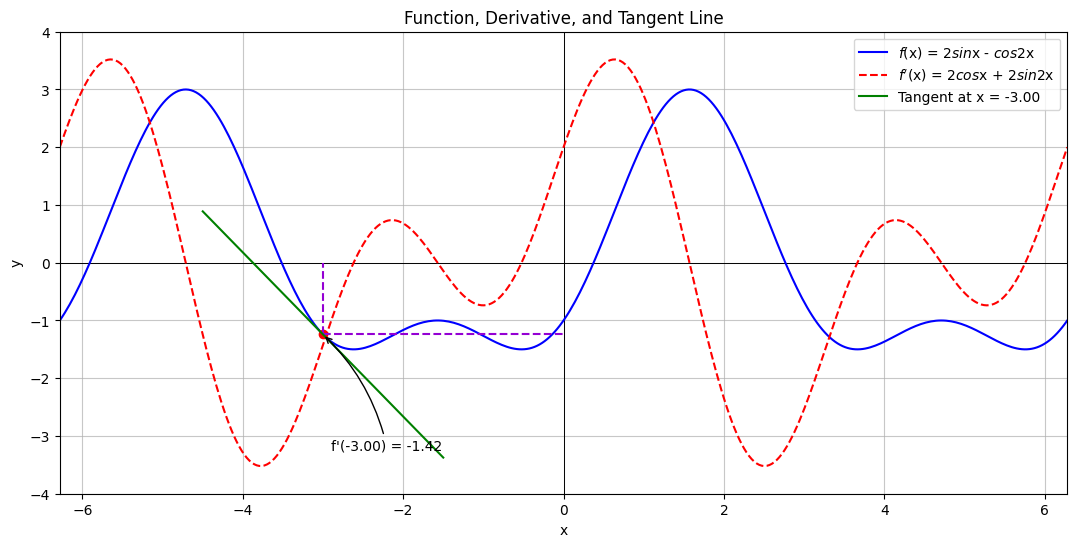

In [65]:
  beauty_derivative_plot(-3)

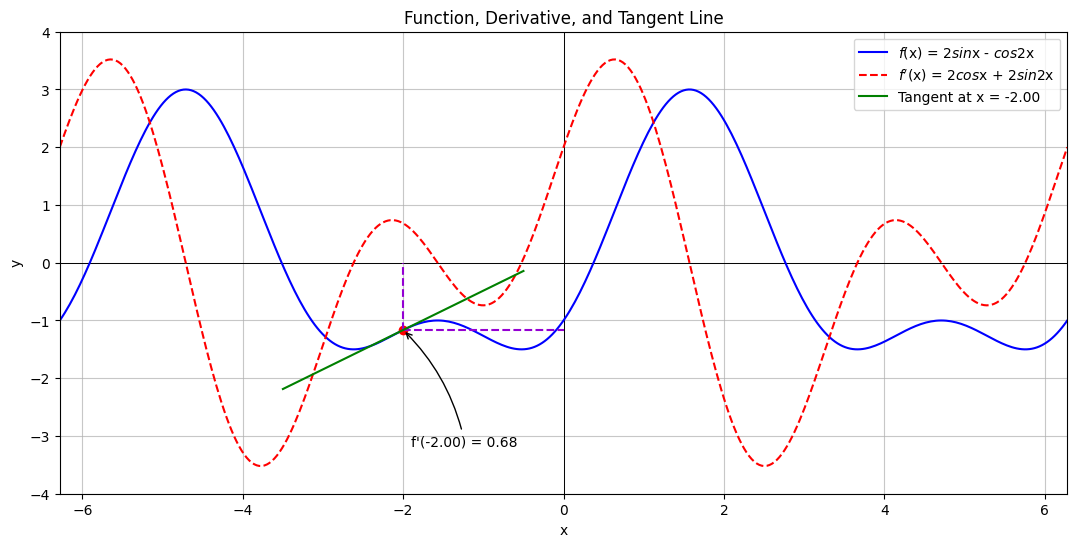

In [66]:
  beauty_derivative_plot(-2)

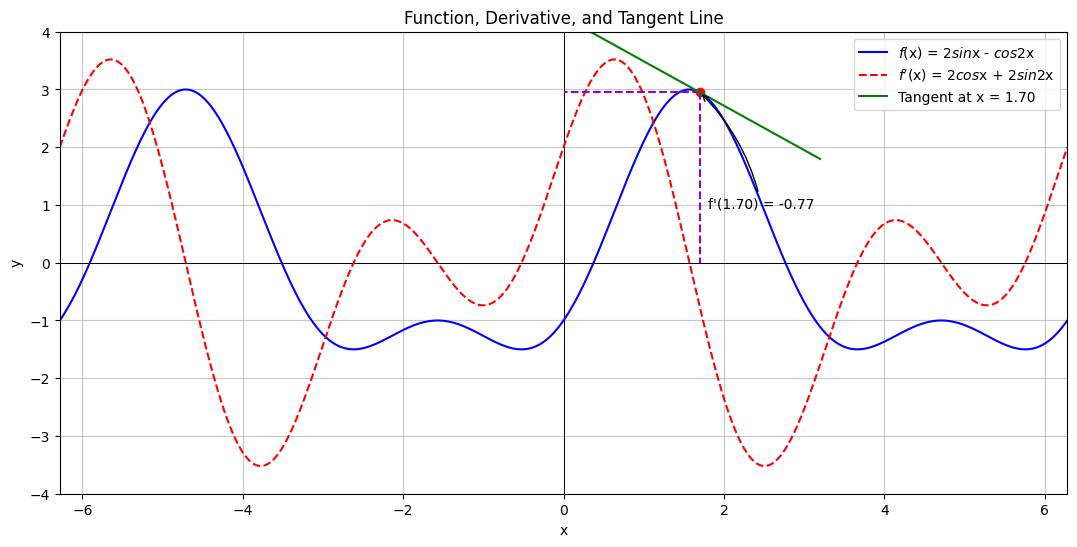

In [67]:
  beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [71]:
data = np.loadtxt('populations.txt')
years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

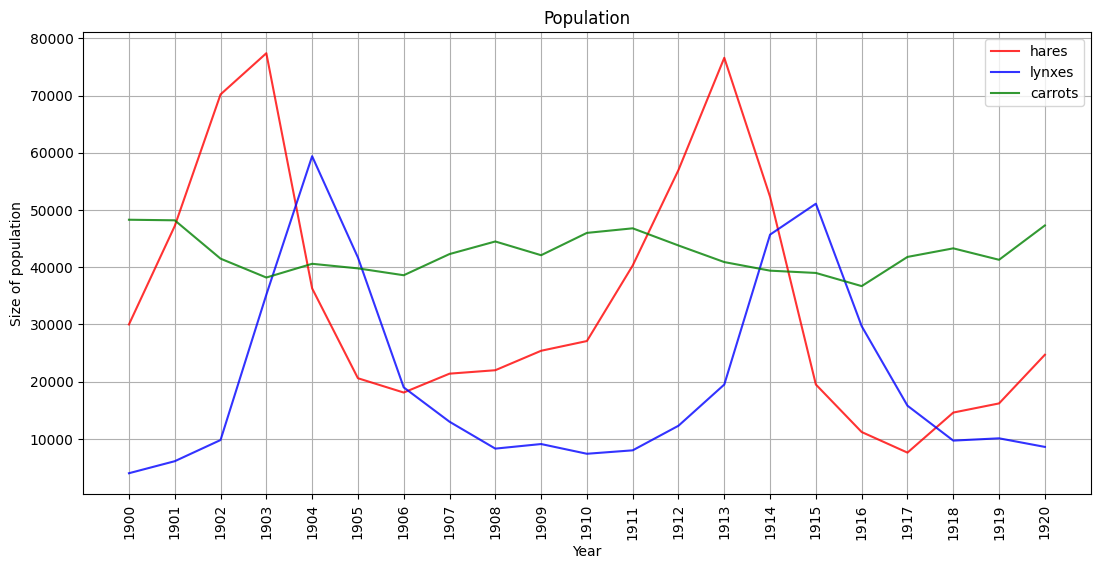

In [144]:
plt.figure(figsize=(13, 6))
plt.plot(years, hares, label="hares", color = 'red', alpha = 0.8)
plt.plot(years, lynxes, label="lynxes", color = 'blue', alpha = 0.8)
plt.plot(years, carrots, label="carrots", color = 'green', alpha = 0.8)
plt.xticks(years, rotation=90)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Size of population")
plt.title("Population")
plt.grid()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

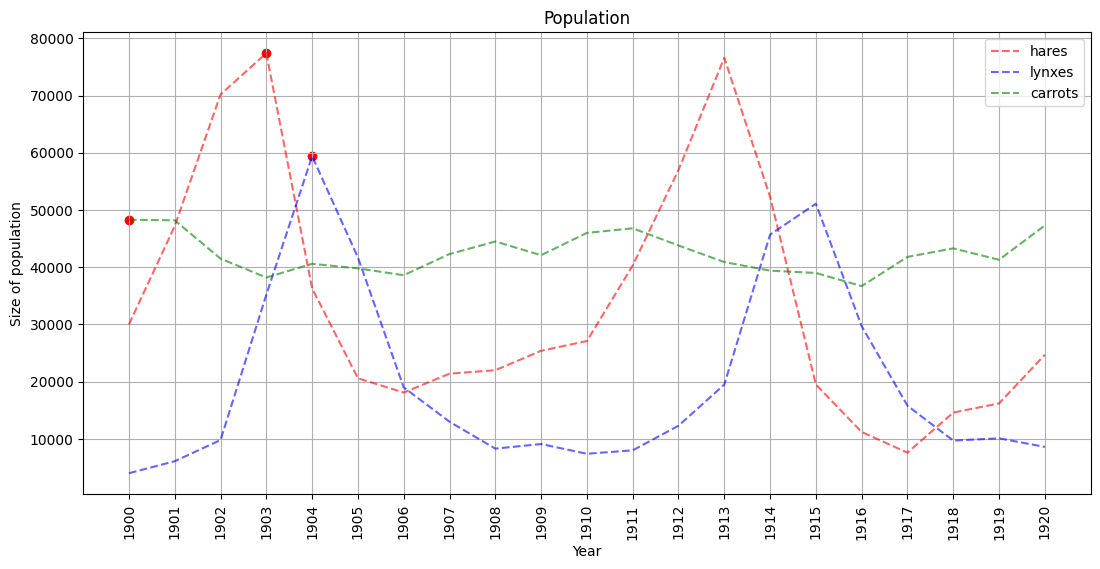

In [145]:
maxes = np.max(data[:,[1,2,3]], axis=0)
plt.figure(figsize=(13, 6))
plt.scatter(data[np.argmax(data[:,[1,2,3]], axis=0), 0], maxes, color='red')
plt.plot(years, hares, label="hares", color = 'red', alpha = 0.6, linestyle = '--')
plt.plot(years, lynxes, label="lynxes", color = 'blue', alpha = 0.6, linestyle = '--')
plt.plot(years, carrots, label="carrots", color = 'green', alpha = 0.6, linestyle = '--')
plt.xticks(years, rotation=90)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Size of population")
plt.title("Population")
plt.grid()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

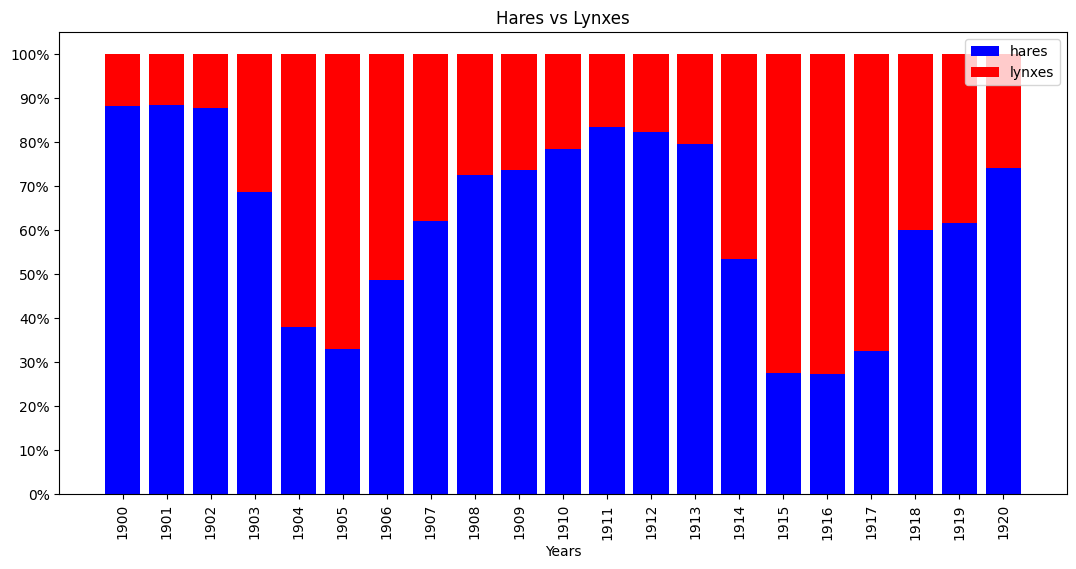

In [146]:
total_pop = hares+lynxes
plt.figure(figsize=(13,6))
plt.bar(years, hares/total_pop*100, color ="blue", label="hares")
plt.bar(years, lynxes/total_pop*100, bottom=hares/total_pop*100, color ="red", label="lynxes")
plt.yticks(range(0,101,10), labels=[f"{i}%" for i in range(0,101, 10)])
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.title("Hares vs Lynxes")
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

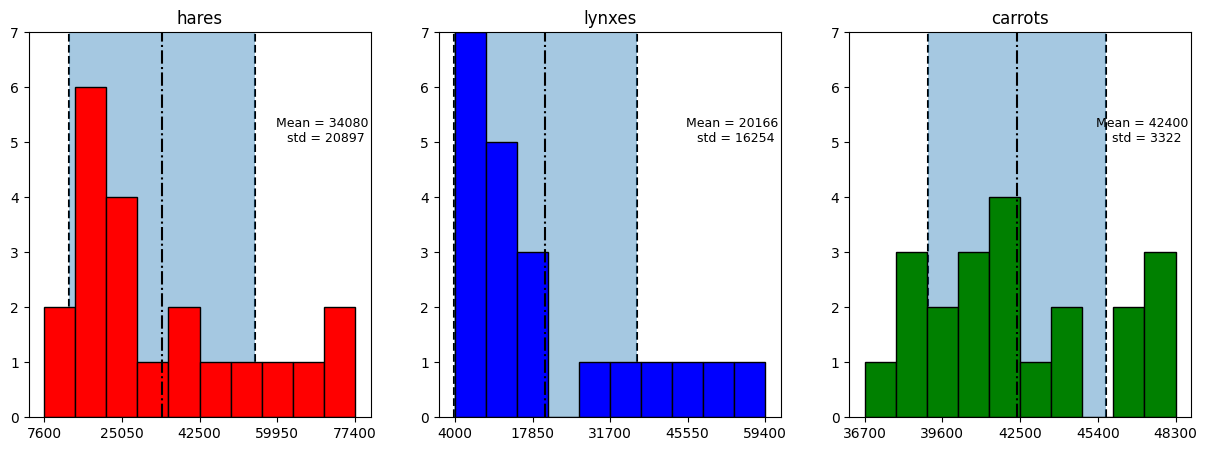

In [104]:
fig, ax = plt.subplots(1,3, figsize = (15, 5))
c = ['red', 'blue', 'green']
for i, title in enumerate(["hares", "lynxes", "carrots"]):
  ax[i].hist(data[:, i+1], bins = 10, color=c[i], edgecolor="black",zorder=2)
  ax[i].set_yticks(range(0,8))
  ax[i].axvline(data[:, i+1].mean() + data[:, i+1].std(), color="black", linestyle="--",zorder=1)
  ax[i].axvline(data[:, i+1].mean() - data[:, i+1].std(), color="black", linestyle="--",zorder=1)
  ax[i].fill_between([data[:, i+1].mean() - data[:, i+1].std(), data[:, i+1].mean() + data[:, i+1].std()], 0, 7, alpha=0.4,zorder=1)
  ax[i].set_xticks(np.linspace(data[:, i+1].min(), data[:, i+1].max(), 5))
  ax[i].text((data[:, i+1].max() - data[:, i+1].min())/20*18 + data[:, i+1].min(), 5, f"Mean = {int(data[:, i+1].mean())} \n std = {int(data[:, i+1].std())}",
             horizontalalignment='center', fontsize=9)
  ax[i].set_title(title)
  ax[i].set_ylim(0,7)
  ax[i].axvline(data[:, i+1].mean(), color="black", linestyle="-.")
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

H | H | H | H | L | L | L | H | H | H | H | H | H | H | H | L | L | L | H | H | H


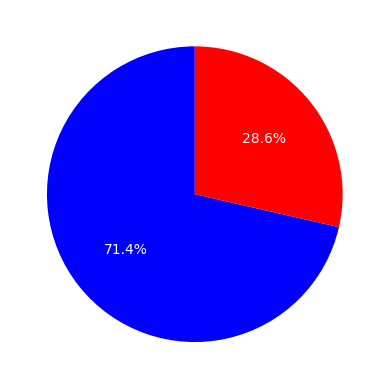

In [114]:
max_pop = np.array(["H","L"])[data[:,[1,2]].argmax(axis=1)]
print(" | ".join(max_pop))
plt.pie([sum(max_pop=="H"),sum(max_pop=="L")], labels=["hares", "lynxes"], autopct="%1.1f%%", colors=["blue", "red"], startangle = 90, textprops = {'color':'white'})
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

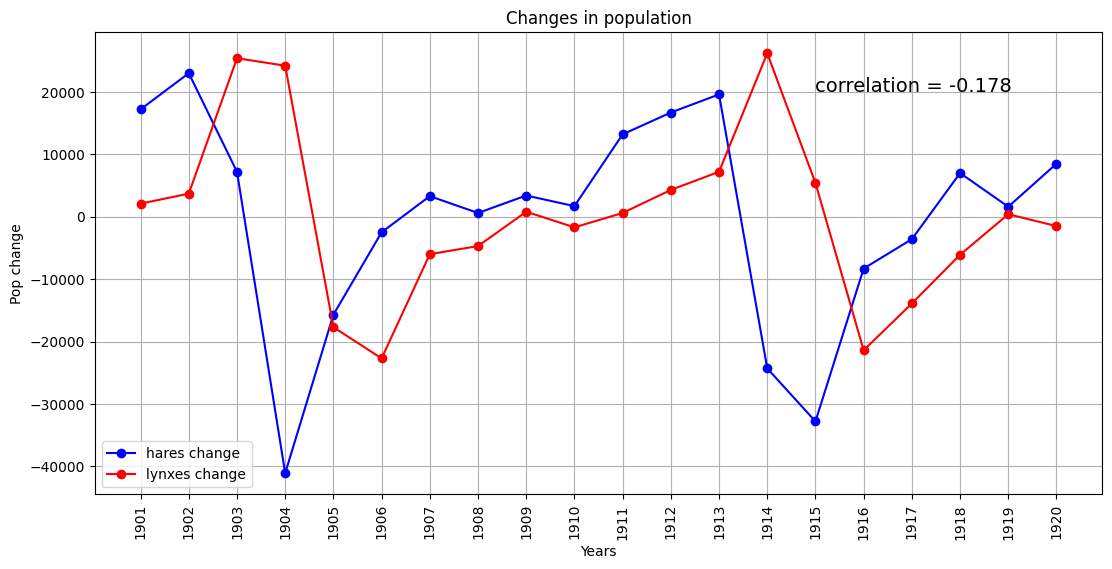

In [123]:
plt.figure(figsize=(13, 6))
plt.plot(years[1:], hares[1:]-hares[:-1], color="blue", marker="o", label="hares change")
plt.plot(years[1:], lynxes[1:]-lynxes[:-1], color="red", marker="o", label="lynxes change")
# plt.figure(figsize = (5, 15))
plt.xticks(years[1:], rotation=90)
plt.legend()
plt.title("Changes in population")
plt.xlabel("Years")
plt.ylabel("Pop change")
plt.grid()
plt.text(1915, 20000, f"correlation = {round(np.corrcoef(lynxes[1:]-lynxes[:-1], hares[1:]-hares[:-1])[0,1],3)}", fontsize=14)
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

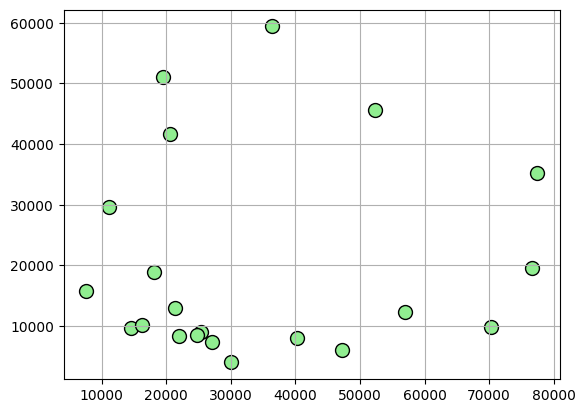

In [126]:
plt.scatter(hares, lynxes, color='lightgreen',s = 100, edgecolors="black")
plt.grid()
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [143]:
from sklearn.linear_model import Ridge

X_train = data[:-1, [0, 2, 3]]
y_train = data[:-1, 1]

l_m = Ridge(alpha = 0.6)
l_m.fit(X_train, y_train)

pred = l_m.predict(data[-1, [0, 2, 3]].reshape(1, -1))[0]

print(f"Prediction = {pred:.3f}")
print(f"True value = {data[-1, 1]}")
print(f"Ration = {pred/data[-1, 1]:.3f}; sad((")

Prediction = 15156.404
True value = 24700.0
Ration = 0.614; sad((
